In [3]:
import pickle
'''
提取开始时间、结束时间、开始lat、开始lng、结束lat、结束lng、骑行时长、预计骑行时间、距离
保存成文件
'''
all_cyclings_paths = pickle.load(open(r"L:\pycharm projects\Bike_Scrapper\main\all_cyclings_paths.pkl", "rb"))
with open("selected_cycs.csv",'w',encoding="utf-8") as f:
    f.write(','.join(["start_time","end_time","start_lat","start_lng","end_lat","end_lng","act_duration","duration","distance"]))
    f.write('\n')
    for x,bike in enumerate(all_cyclings_paths):
        print('正在处理第%s辆单车'%x,end='\r')
        cycs=bike["cyclings"]
        jump_empty=False
        if jump_empty:
           bound=3200
           if x>=bound:
               break



        for cyc in cycs:

#             print(cyc)
            start_time=cyc.get('start_time')
            act_duration=cyc.get('path').get('act_duration')
            start_lat=cyc['start_pos'][0]
            start_lng=cyc['start_pos'][1]
            end_lat=cyc['end_pos'][0]
            end_lng=cyc['end_pos'][1]
            duration=cyc['path']['duration']
            distance=cyc['path']["distance"]
            end_time=cyc['end_time']
            if distance>10 and act_duration>10  :#筛选预计时间>0和 实际时间/预计时间<5的记录
                f.write(','.join([str(i) for i in [start_time,end_time,start_lat,start_lng,end_lat,end_lng,act_duration,duration,distance]]))
                f.write('\n')


In [4]:
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 

'''
读取保存的文件
将时间戳转化成0-24的float
'''
f=pd.read_csv("selected_cycs.csv")

f2=pd.read_csv(r"L:\pycharm projects\Bike_Scrapper\RecoveredBikeData\2022-11\16\allBikes.csv",sep='\t')
headers=['time','bikeNo','lon','lat']
f2.columns=headers
times=list(sorted(set(f2['time'])))
f["start_time"]=f["start_time"].apply(lambda x:times.index(x)*24/len(times))
f["end_time"]=f["end_time"].apply(lambda x:times.index(x)*24/len(times))

In [5]:
from sklearn import preprocessing
'''
提取所需列
z_score标准化处理
'''
X_scaled = preprocessing.scale(f[['start_time','end_time','distance','act_duration',]])
X=X_scaled

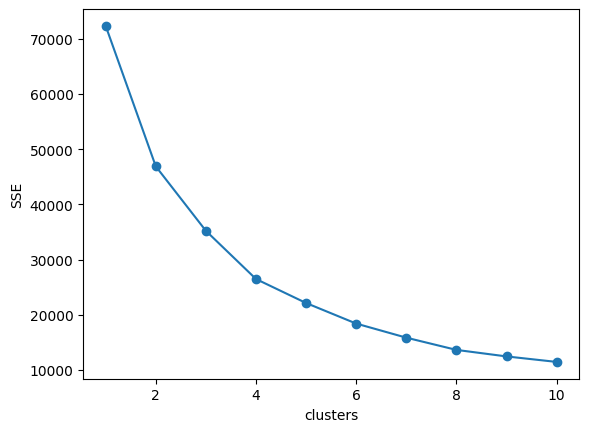

In [8]:
'''
绘制图4
'''
from sklearn.cluster import KMeans
x=X
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init="k-means++")
    km.fit(x)
    #获取K-means算法的SSE
    distortions.append(km.inertia_)
#绘制曲线
plt.plot(range(1,11),distortions,marker="o")
plt.xlabel("clusters")
plt.ylabel("SSE")
plt.savefig('k-mean.png')
plt.show()

In [11]:
'''
选取n=3进行聚类
将聚类标签添加到原df
保存聚类结果
'''
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4,init="k-means++")
km.fit(X)
f['labels']=km.labels_
f.to_csv("clustering_res.csv",index=False,encoding='utf-8')